# Task 1

Try different value combinations for lower and upper thresholds and save resultant images. 

- lower=0, upper=255
- lower=128, upper=128
- lower=255, upper=255

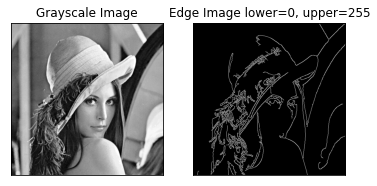

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../slike/lenna.bmp',0)
blurred = cv2.GaussianBlur(img, (5,5), 0)

edges_0_255 = cv2.Canny(blurred,0,255)
edges_128_128=cv2.Canny(blurred,128,128)
edges_255_255=cv2.Canny(blurred,255,255)


plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges_0_255,cmap = 'gray')
plt.title('Edge Image lower=0, upper=255'), plt.xticks([]), plt.yticks([])
plt.show()

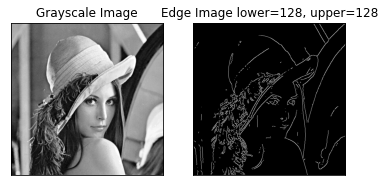

In [15]:
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges_128_128,cmap = 'gray')
plt.title('Edge Image lower=128, upper=128'), plt.xticks([]), plt.yticks([])
plt.show()

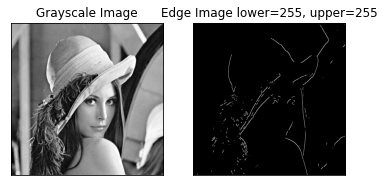

In [16]:
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges_255_255,cmap = 'gray')
plt.title('Edge Image lower=255, upper=255'), plt.xticks([]), plt.yticks([])
plt.show()

# Task 2

Perform automatic Canny edge detection on images: airplane.bmp , barbara.bmp , boats.bmp , pepper.bmp .
Write down obtained median thresholds and save result images.

In [24]:
import numpy as np
import argparse
import glob
import cv2
from matplotlib import pyplot as plt

def auto_canny(image, sigma=0.33):
        # compute the median of the single channel pixel intensities
        v = np.median(image)

        # apply automatic Canny edge detection using the computed median
        lower = int(max(0, (1.0 - sigma) * v))
        upper = int(min(255, (1.0 + sigma) * v))
        edged = cv2.Canny(image, lower, upper)
        print("Median lower: %r." % lower)
        print("Median upper: %r." % upper)
        # return the edged image
        return edged

Median lower: 134.
Median upper: 255.


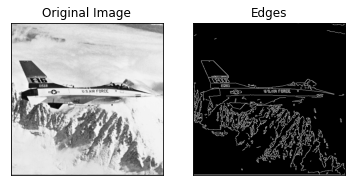

In [20]:
image = cv2.imread("../slike/airplane.bmp",0)
auto = auto_canny(image)

plt.subplot(121),plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(auto,  'gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])
plt.show()

Median lower: 72.
Median upper: 143.


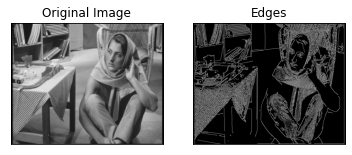

In [21]:
image = cv2.imread("../slike/barbara.bmp",0)
auto = auto_canny(image)

plt.subplot(121),plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(auto,  'gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])
plt.show()

Median lower: 92.
Median upper: 183.


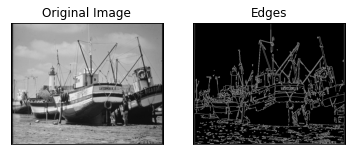

In [22]:
image = cv2.imread("../slike/boats.bmp",0)
auto = auto_canny(image)

plt.subplot(121),plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(auto,  'gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])
plt.show()

Median lower: 81.
Median upper: 160.


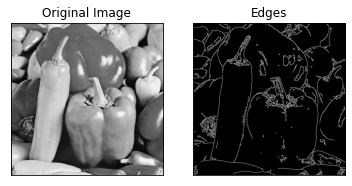

In [23]:
image = cv2.imread("../slike/pepper.bmp",0)
auto = auto_canny(image)

plt.subplot(121),plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(auto,  'gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])
plt.show()

# Task 3

Find lines with Hough transform on the image: chess.jpg.
Change theta and threshold parameters to the following values:

- theta= 90, threshold = 150 
- theta=180, threshold = 200 
- theta= 90, threshold = 200 
- theta=180, threshold = 150

In [36]:
import cv2
import numpy as np
import math
import copy
from matplotlib import pyplot as plt

img = cv2.imread('../slike/chess.jpg')
img2 = copy.copy(img)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 166, 255)

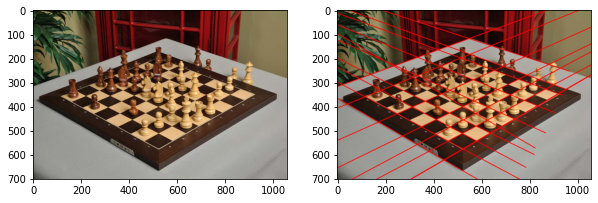

In [37]:
lines= cv2.HoughLines(edges, 1, math.pi/90, 150, np.array([]), 0, 0)

a,b,c = lines.shape
for i in range(a):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0, y0 = a*rho, b*rho
    pt1 = ( int(x0+1000*(-b)), int(y0+1000*(a)) )
    pt2 = ( int(x0-1000*(-b)), int(y0-1000*(a)) )
    cv2.line(img2, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)

f=plt.figure(figsize=(10,10))
f.add_subplot(121,),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
f.add_subplot(122),plt.imshow(img2, 'gray')
plt.show()

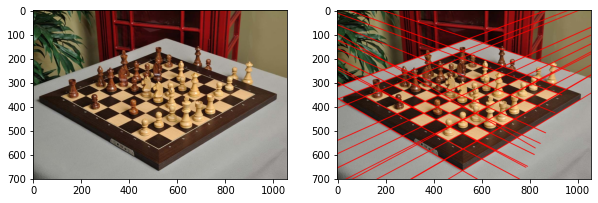

In [38]:
lines= cv2.HoughLines(edges, 1, math.pi/180, 200, np.array([]), 0, 0)

a,b,c = lines.shape
for i in range(a):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0, y0 = a*rho, b*rho
    pt1 = ( int(x0+1000*(-b)), int(y0+1000*(a)) )
    pt2 = ( int(x0-1000*(-b)), int(y0-1000*(a)) )
    cv2.line(img2, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)

f=plt.figure(figsize=(10,10))
f.add_subplot(121,),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
f.add_subplot(122),plt.imshow(img2, 'gray')
plt.show()

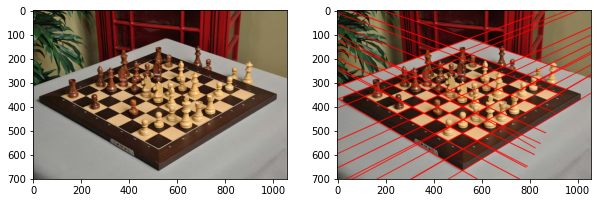

In [39]:
lines= cv2.HoughLines(edges, 1, math.pi/90, 200, np.array([]), 0, 0)

a,b,c = lines.shape
for i in range(a):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0, y0 = a*rho, b*rho
    pt1 = ( int(x0+1000*(-b)), int(y0+1000*(a)) )
    pt2 = ( int(x0-1000*(-b)), int(y0-1000*(a)) )
    cv2.line(img2, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)

f=plt.figure(figsize=(10,10))
f.add_subplot(121,),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
f.add_subplot(122),plt.imshow(img2, 'gray')
plt.show()

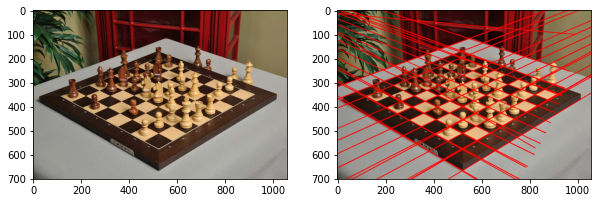

In [40]:
lines= cv2.HoughLines(edges, 1, math.pi/180, 150, np.array([]), 0, 0)

a,b,c = lines.shape
for i in range(a):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0, y0 = a*rho, b*rho
    pt1 = ( int(x0+1000*(-b)), int(y0+1000*(a)) )
    pt2 = ( int(x0-1000*(-b)), int(y0-1000*(a)) )
    cv2.line(img2, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)

f=plt.figure(figsize=(10,10))
f.add_subplot(121,),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
f.add_subplot(122),plt.imshow(img2, 'gray')
plt.show()

# Task 4

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

img = cv2.imread('../slike/chess.jpg')
img2 = copy.copy(img)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

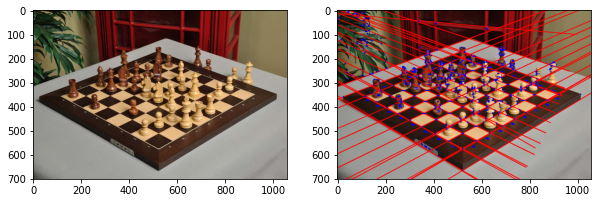

In [43]:
dst = cv2.cornerHarris(gray,1,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# threshold for an optimal value, it may vary depending on the image.
img2[dst>0.01*dst.max()]=[0,0,255]

f=plt.figure(figsize=(10,10))
f.add_subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
f.add_subplot(122),plt.imshow(img2 , 'gray')
plt.show()

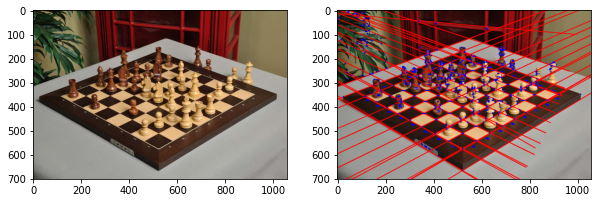

In [44]:
dst = cv2.cornerHarris(gray,3,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# threshold for an optimal value, it may vary depending on the image.
img2[dst>0.01*dst.max()]=[0,0,255]

f=plt.figure(figsize=(10,10))
f.add_subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
f.add_subplot(122),plt.imshow(img2 , 'gray')
plt.show()

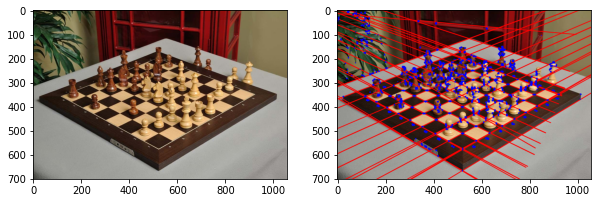

In [45]:
dst = cv2.cornerHarris(gray,5,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# threshold for an optimal value, it may vary depending on the image.
img2[dst>0.01*dst.max()]=[0,0,255]

f=plt.figure(figsize=(10,10))
f.add_subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
f.add_subplot(122),plt.imshow(img2 , 'gray')
plt.show()

# Task 6

Perform ORB feature detection on image roma_1.jpg .
Perform matching of images roma_1.jpg and roma_2.jpg.
Save result images.


In [56]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

# Features Detection: 
dataset_path = '.'
img = cv2.imread(os.path.join(dataset_path, '../slike/roma_1.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert

orb = cv2.ORB_create()
key_points, description = orb.detectAndCompute(img, None)
#img_building_keypoints =cv2.drawKeypoints(img_building,key_points,img_building,flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
# rich keypoints: 
img_keypoints =cv2.drawKeypoints(img,key_points,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Feature Extraction:
def image_detect_and_compute(detector, img_name):
    """Detect and compute intetrest points and their descriptors."""
    img = cv2.imread(os.path.join(dataset_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des

def draw_image_matches(detector, img1_name, img2_name, nmatches=20):
    """Draw ORB feature matches of the given two images."""
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance)

    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches],img2, flags=2)
#Draw Resultant Images:
    f=plt.figure(figsize=(20,20))
    f.add_subplot(121),plt.imshow(img_keypoints)
    f.add_subplot(122),plt.imshow(img_matches)
    plt.show()

orb = cv2.ORB_create()


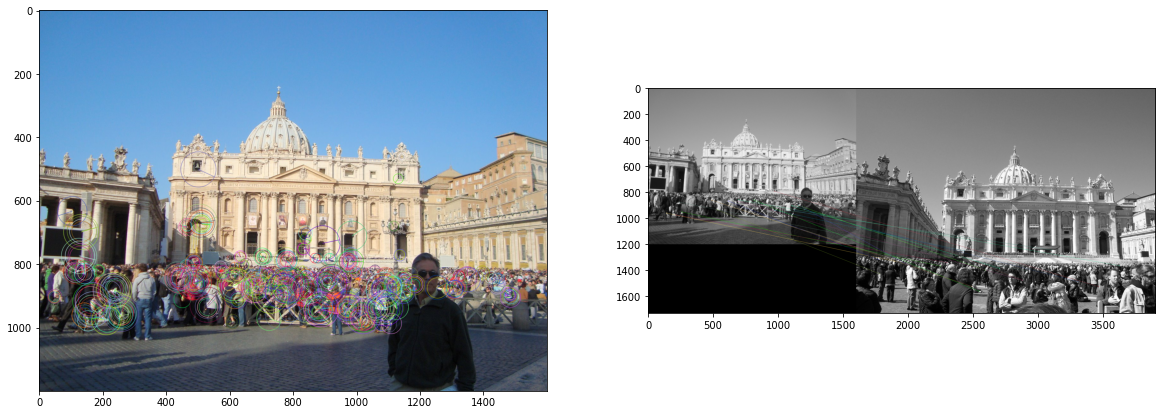

In [57]:
draw_image_matches(orb, '../slike/roma_1.jpg','../slike/roma_2.jpg')